# Mini_Project_Fatal Pedestrian Crash Hotspot Analysis on Multilane ArterialRoads in Iowa - Miguel Diaz - F2024-CE-5900-16

#### Libraries to install

In [8]:
# !pip install osmnx
# !pip install geopandas
# !pip install geopandas seaborn pysal
# !pip install libpysal esda
# !pip install esda
# !pip install scikit-learn
# !pip install imbalanced-learn
# !pip install plotly


# 1. Use OpenStreetMap to identify multilane arterial roads in Iowa

In [23]:
import osmnx as ox
import pandas as pd

In [24]:
%%time

# Define location and road filters (Iowa)
place = "Iowa, USA"

# Download road network data from OpenStreetMap
G = ox.graph_from_place(place, network_type='drive')

# Extract edges (roads) and their attributes
edges = ox.graph_to_gdfs(G, nodes=False)

# Function to handle 'lanes' attribute, extracting the first element if it's a list
def extract_lanes(lane_info):
    if isinstance(lane_info, list):
        try:
            return float(lane_info[0])
        except:
            return None
    elif isinstance(lane_info, str):
        try:
            return float(lane_info)
        except:
            return None
    return None

# Apply the function to create a numeric 'lanes' column
edges['lanes_numeric'] = edges['lanes'].apply(extract_lanes)

# Filter for multilane roads and specific road types (arterial roads)
multilane_arterial_roads = edges[
    (edges['lanes_numeric'] > 1) &
    (edges['highway'].isin(['primary', 'secondary', 'tertiary']))
]

# Save filtered roads to a GeoJSON file
multilane_arterial_roads.to_file("multilane_arterial_roads_iowa.geojson", driver='GeoJSON')

print("GeoJSON file saved successfully.")


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


GeoJSON file saved successfully.
CPU times: user 9min 45s, sys: 21.7 s, total: 10min 6s
Wall time: 12min 7s


In [25]:
ls

cache/    multilane_arterial_roads_iowa.geojson  pedestrian_fatalities_map.html
Fars.csv  pedestrian_fatalities_iowa.csv         sample_data/


In [56]:
import geopandas as gpd

# Load the GeoJSON file
geojson_file = "multilane_arterial_roads_iowa.geojson"
gdf = gpd.read_file(geojson_file)

# Save as a Shapefile (.shp)
shapefile_path = "multilane_arterial_roads_iowa.shp"
gdf.to_file(shapefile_path, driver='ESRI Shapefile')

print("Shapefile saved successfully.")

<ipython-input-56-7d866eb49c70>:9: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



Shapefile saved successfully.


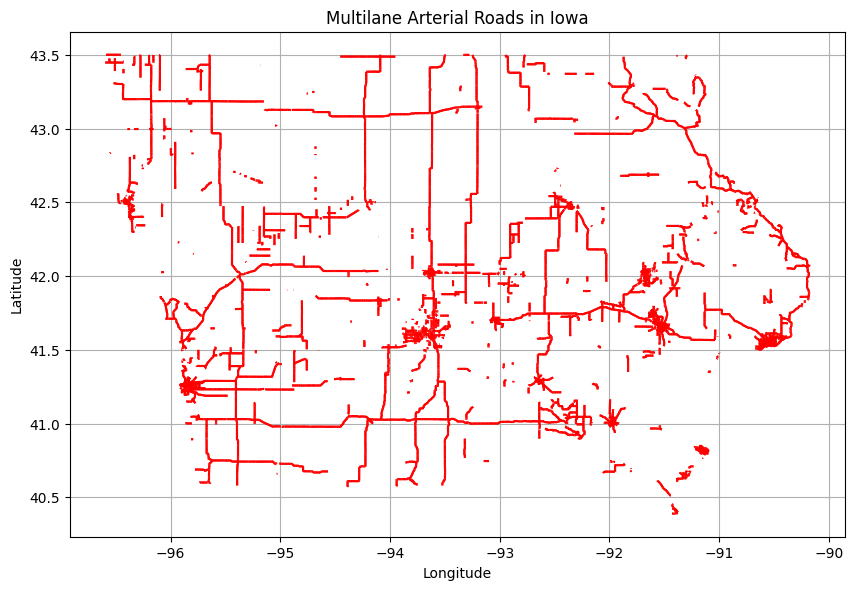

In [58]:
# Plot the shapefile using Geopandas and Matplotlib
gdf.plot(figsize=(10, 10), edgecolor='red')
plt.title("Multilane Arterial Roads in Iowa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## **Data visualization (multilane arterial roads in Iowa)**

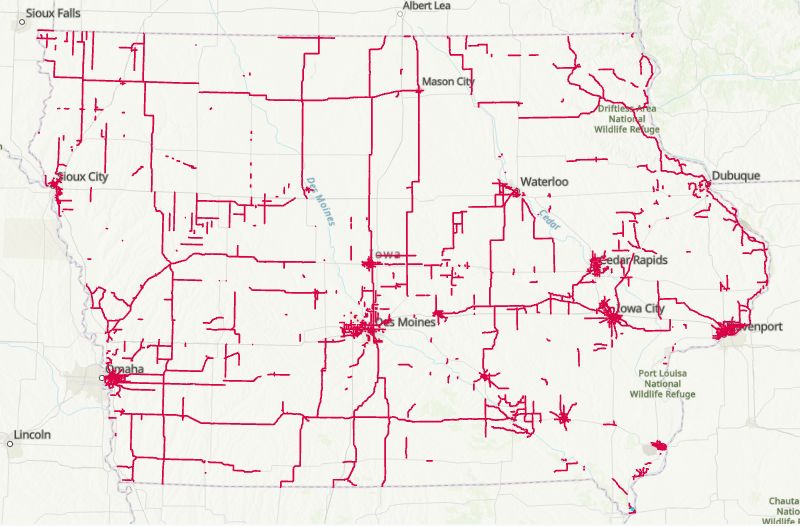

In [27]:
ls

cache/                                 multilane_arterial_roads_iowa.shp
Fars.csv                               multilane_arterial_roads_iowa.shx
multilane_arterial_roads_iowa.cpg      pedestrian_fatalities_iowa.csv
multilane_arterial_roads_iowa.dbf      pedestrian_fatalities_map.html
multilane_arterial_roads_iowa.geojson  sample_data/
multilane_arterial_roads_iowa.prj


# 2. Extract crash data from FARS database, focusing on pedestrian fatalities.

### Reading FARS WITH FATALITIES FOR PEDESTRIANS

#### FROM: https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/

### You can download my FARS file from this link: https://drive.google.com/file/d/1NvsHOPAHt123YS0UqvMU65evI2kr_qCM/view?usp=drive_link,

Then pull it into your content folder to run the code.
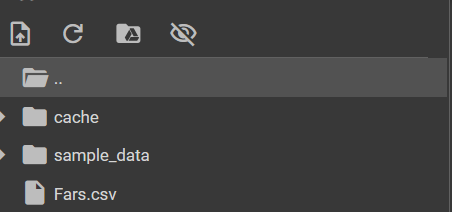

In [28]:
# Load the FARS CSV file

# /content/Fars.csv
# https://drive.google.com/file/d/1NvsHOPAHt123YS0UqvMU65evI2kr_qCM/view?usp=drive_link



df = pd.read_csv('Fars.csv')

# Print the first few rows and column names to inspect the data
print(df.head())
print(df.columns)

   Unnamed: 0  STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  \
0       13437     19      Iowa   190001         1         1         0     0   
1       13438     19      Iowa   190002         1         1         0     0   
2       13439     19      Iowa   190003         1         1         0     0   
3       13440     19      Iowa   190004         1         1         0     0   
4       13441     19      Iowa   190005         2         2         0     0   

   PERSONS  PERMVIT  ...  HOSP_MN                       HOSP_MNNAME   CF1  \
0        2        2  ...       30                                30   0.0   
1        1        1  ...       21                                21   0.0   
2        1        1  ...       88  Not Applicable (Not Transported)   0.0   
3        1        1  ...       88  Not Applicable (Not Transported)   0.0   
4        2        2  ...       88  Not Applicable (Not Transported)  20.0   

                   CF1NAME  CF2  CF2NAME  CF3  CF3NAME FATALS 

In [29]:
# Filter for crashes where at least one pedestrian was involved (PEDS > 0)
pedestrian_fatalities = df[df['PEDS'] > 0]

# Save the filtered data to a new CSV
pedestrian_fatalities.to_csv('pedestrian_fatalities_iowa.csv', index=False)

print("Filtered data saved successfully.")

Filtered data saved successfully.


In [30]:
pedestrian_fatalities

,Unnamed: 0,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
17,13454,19,Iowa,190018,1,1,0,1,1,1,...,52,52,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
19,13456,19,Iowa,190020,1,1,0,1,1,1,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
31,13468,19,Iowa,190033,1,1,0,1,5,5,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
44,13481,19,Iowa,190046,1,1,0,1,3,3,...,26,26,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
54,13491,19,Iowa,190056,2,2,0,1,4,4,...,88,Not Applicable (Not Transported),14.0,"Motor Vehicle struck by falling cargo,or somet...",0.0,NaN,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,153435,19,Iowa,190292,1,1,0,1,1,1,...,32,32,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1513,153446,19,Iowa,190303,1,1,0,2,1,1,...,9,9,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1517,153450,19,Iowa,190307,1,1,0,1,1,1,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1520,153453,19,Iowa,190310,1,1,0,1,1,1,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [31]:
import os

# List files in the current working directory
print(os.listdir())

['.config', 'multilane_arterial_roads_iowa.shp', 'pedestrian_fatalities_iowa.csv', 'pedestrian_fatalities_map.html', 'cache', 'Fars.csv', 'multilane_arterial_roads_iowa.cpg', 'multilane_arterial_roads_iowa.shx', 'multilane_arterial_roads_iowa.prj', 'multilane_arterial_roads_iowa.dbf', 'multilane_arterial_roads_iowa.geojson', 'sample_data']


### Data Spatial visualization with Folium and HTML

In [32]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Load the saved CSV file
pedestrian_fatalities = pd.read_csv('pedestrian_fatalities_iowa.csv')

# Create a GeoDataFrame from the CSV data using LATITUDE and LONGITUD columns
gdf = gpd.GeoDataFrame(
    pedestrian_fatalities,
    geometry=gpd.points_from_xy(pedestrian_fatalities.LONGITUD, pedestrian_fatalities.LATITUDE),
    crs="EPSG:4326"
)

# Create a Folium map centered on Iowa
m = folium.Map(location=[41.878, -93.097], zoom_start=7)

# Add a marker cluster for better visualization of multiple points
marker_cluster = MarkerCluster().add_to(m)

# Add each pedestrian fatality as a marker on the map
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"City: {row['CITY']}, Pedestrians: {row['PEDS']}"
    ).add_to(marker_cluster)

# Save the map as an HTML file
m.save('pedestrian_fatalities_map.html')

print("Map created successfully! Open 'pedestrian_fatalities_map.html' to view it.")


Map created successfully! Open 'pedestrian_fatalities_map.html' to view it.


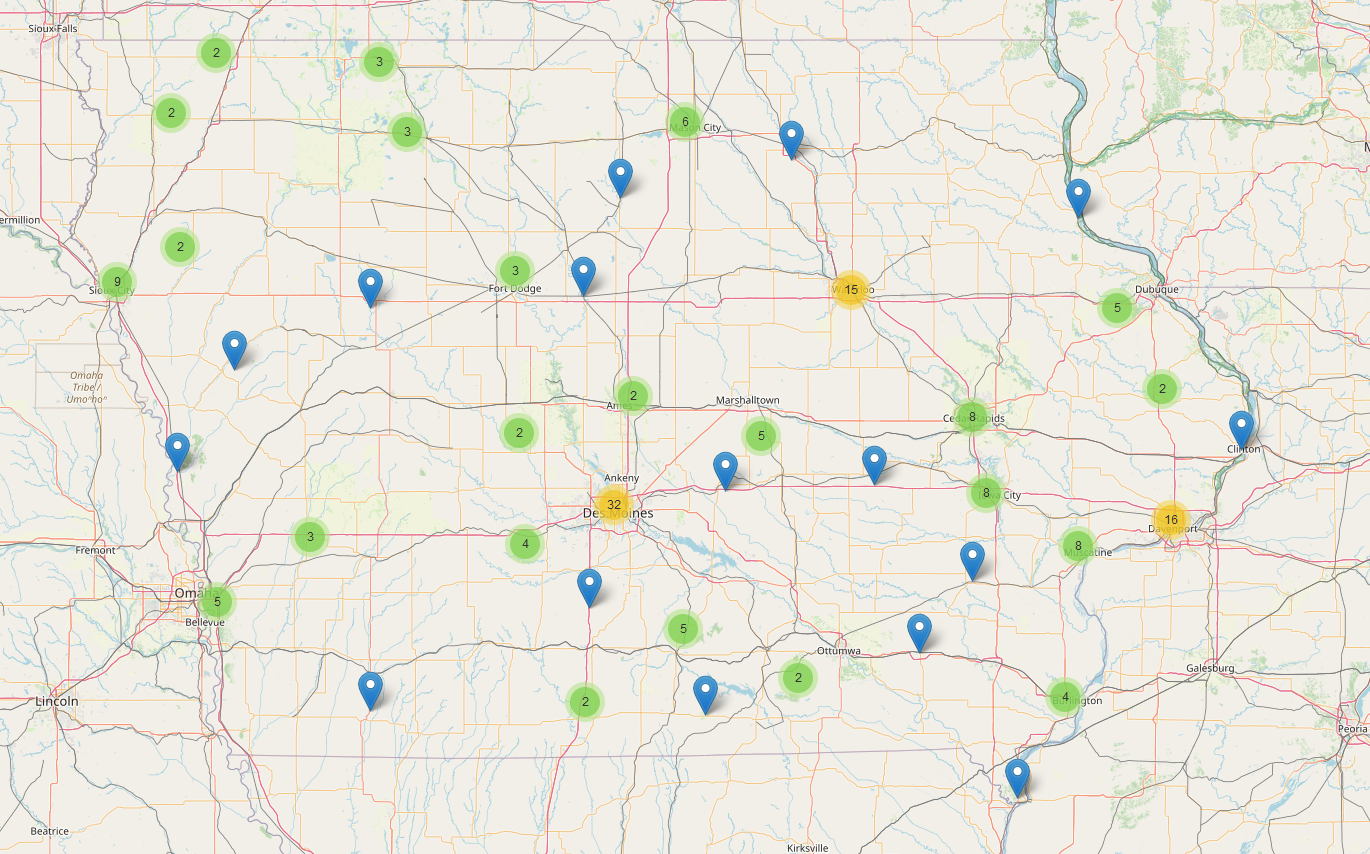

# **3. Apply spatial analysis techniques (e.g., kernel density estimation, Getis-Ord Gi*) to identify hotspots.**

In [33]:
import geopandas as gpd
import seaborn as sns
import numpy as np
from scipy.stats import kde
import matplotlib.pyplot as plt

### Kernel Density Estimation (KDE)

<Axes: xlabel='LONGITUD', ylabel='LATITUDE'>

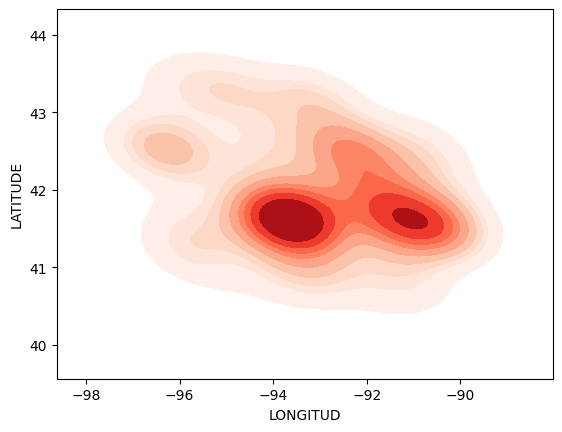

In [34]:
# Plot KDE to visualize hotspots
sns.kdeplot(data=pedestrian_fatalities, x='LONGITUD', y='LATITUDE', cmap='Reds', fill=True)

<ipython-input-35-aa0bf774b181>:7: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  kde_model = kde.gaussian_kde(xy, bw_method='scott')  # Adjust bandwidth as needed


Hotspot Coordinates (Longitude, Latitude):
[[-94.72149342  41.53812017]
 [-94.72149342  41.5890272 ]
 [-94.72149342  41.63993422]
 ...
 [-90.10804386  41.48721314]
 [-90.10804386  41.53812017]
 [-90.10804386  41.5890272 ]]


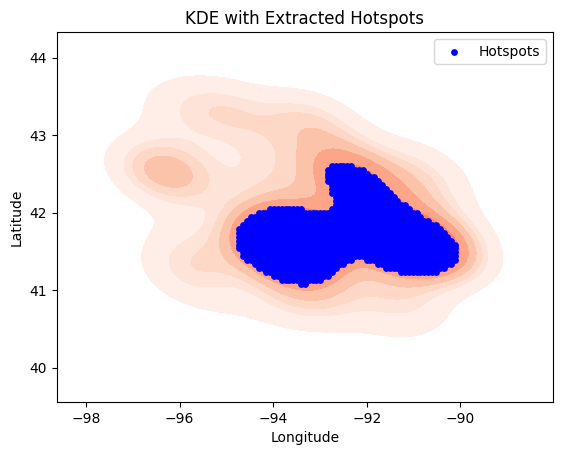

In [35]:
# Extract longitude and latitude data
x = pedestrian_fatalities['LONGITUD']
y = pedestrian_fatalities['LATITUDE']

# Perform KDE using scipy's gaussian_kde
xy = np.vstack([x, y])
kde_model = kde.gaussian_kde(xy, bw_method='scott')  # Adjust bandwidth as needed

# Create a grid to evaluate the KDE over the region
xmin, xmax = x.min() - 1, x.max() + 1
ymin, ymax = y.min() - 1, y.max() + 1
xgrid, ygrid = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
grid_coords = np.vstack([xgrid.ravel(), ygrid.ravel()])

# Evaluate the KDE on the grid
z = kde_model(grid_coords)
z = z.reshape(xgrid.shape)

# Extract hotspots by applying a threshold (e.g., 90th percentile of KDE values)
threshold = np.percentile(z, 90)  # Set your threshold for hotspot extraction
hotspots = np.argwhere(z >= threshold)

# Convert grid indices to geographic coordinates
hotspot_coords = np.array([
    [xmin + (xmax - xmin) * i / 100, ymin + (ymax - ymin) * j / 100]
    for i, j in hotspots
])

print("Hotspot Coordinates (Longitude, Latitude):")
print(hotspot_coords)

# Plot the KDE with extracted hotspots
sns.kdeplot(x=x, y=y, cmap='Reds', fill=True)
plt.scatter(hotspot_coords[:, 0], hotspot_coords[:, 1], color='blue', s=15, label='Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KDE with Extracted Hotspots')
plt.legend()
plt.show()

### Getis-Ord Gi* function

In [36]:
import geopandas as gpd
from esda.getisord import G  # Getis-Ord Gi* function
import libpysal

# Create a GeoDataFrame using the latitude and longitude columns
gdf = gpd.GeoDataFrame(
    pedestrian_fatalities,
    geometry=gpd.points_from_xy(pedestrian_fatalities['LONGITUD'], pedestrian_fatalities['LATITUDE']),
    crs="EPSG:4326"
)

# Ensure 'crash_count' column exists (if not, assign all rows a count of 1)
if 'PEDS' not in gdf.columns:
    gdf['PEDS'] = 1

# Compute DistanceBand weights (adjust threshold for the spatial clustering scale)
w = libpysal.weights.DistanceBand.from_dataframe(gdf, threshold=1, binary=True)

# Identify disconnected components (islands) and remove them
islands = list(w.islands)  # Get the IDs of the disconnected points (islands)
print(f"Islands (disconnected points): {islands}")

# Filter out disconnected points
gdf_cleaned = gdf.drop(index=islands)

# Recompute weights after removing islands
w_cleaned = libpysal.weights.DistanceBand.from_dataframe(gdf_cleaned, threshold=5, binary=True)
w_knn = libpysal.weights.KNN.from_dataframe(gdf_cleaned, k=5)
# Apply the Getis-Ord Gi* statistic for spatial clustering
gi_star = G(gdf_cleaned['PEDS'], w_cleaned)
gi_star_knn = G(gdf_cleaned['PEDS'], w_knn)
# Print Z-scores to identify statistically significant clusters
print("Z-scores for Gi* statistic (significance of clustering):")
print(gi_star.z_norm)  # Z-scores

# Optional: Print p-values if needed
print("P-values for Gi* statistic:")
print(gi_star.p_norm)  # P-values  Islands

print(gi_star_knn.z_norm)  # Z-scores for KNN weights
print(gi_star_knn.p_norm)  # P-values for KNN weights

Islands (disconnected points): []
Z-scores for Gi* statistic (significance of clustering):
0.9356291482649449
P-values for Gi* statistic:
0.1747320807841728
-1.5922121756725944
0.055668519181315435


### Local Moran’s I Analysis

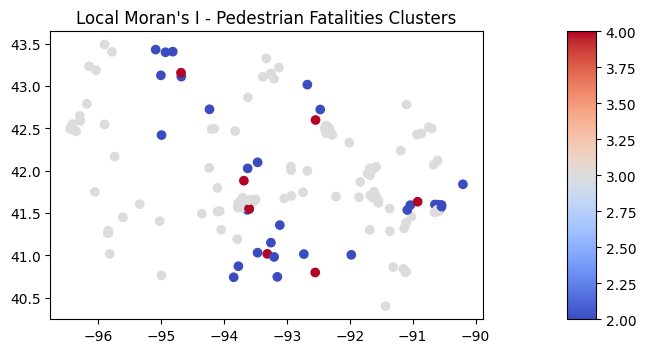

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as lps
from esda.moran import Moran_Local
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Ensure 'PEDS' column exists (if not, assign all rows a count of 1)
if 'PEDS' not in pedestrian_fatalities.columns:
    pedestrian_fatalities['PEDS'] = 1

# Create GeoDataFrame using LATITUDE and LONGITUD columns
gdf = gpd.GeoDataFrame(
    pedestrian_fatalities,
    geometry=gpd.points_from_xy(pedestrian_fatalities['LONGITUD'], pedestrian_fatalities['LATITUDE']),
    crs="EPSG:4326"
)

# Compute spatial weights matrix (KNN for robust results)
w = lps.weights.KNN.from_dataframe(gdf, k=5)
w.transform = 'r'  # Row-standardized weights

# Calculate Local Moran's I
moran_local = Moran_Local(gdf['PEDS'], w)

# Plot the Local Moran's I clusters
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot clusters (1 = High-High, 2 = Low-Low, 3 = Low-High, 4 = High-Low)
gdf['cluster'] = moran_local.q
gdf.plot(column='cluster', cmap='coolwarm', legend=True, ax=ax, cax=cax)

ax.set_title("Local Moran's I - Pedestrian Fatalities Clusters")
plt.show()


# **4. Analyze the characteristics of these hotspots.**

#### TOTAL DATA

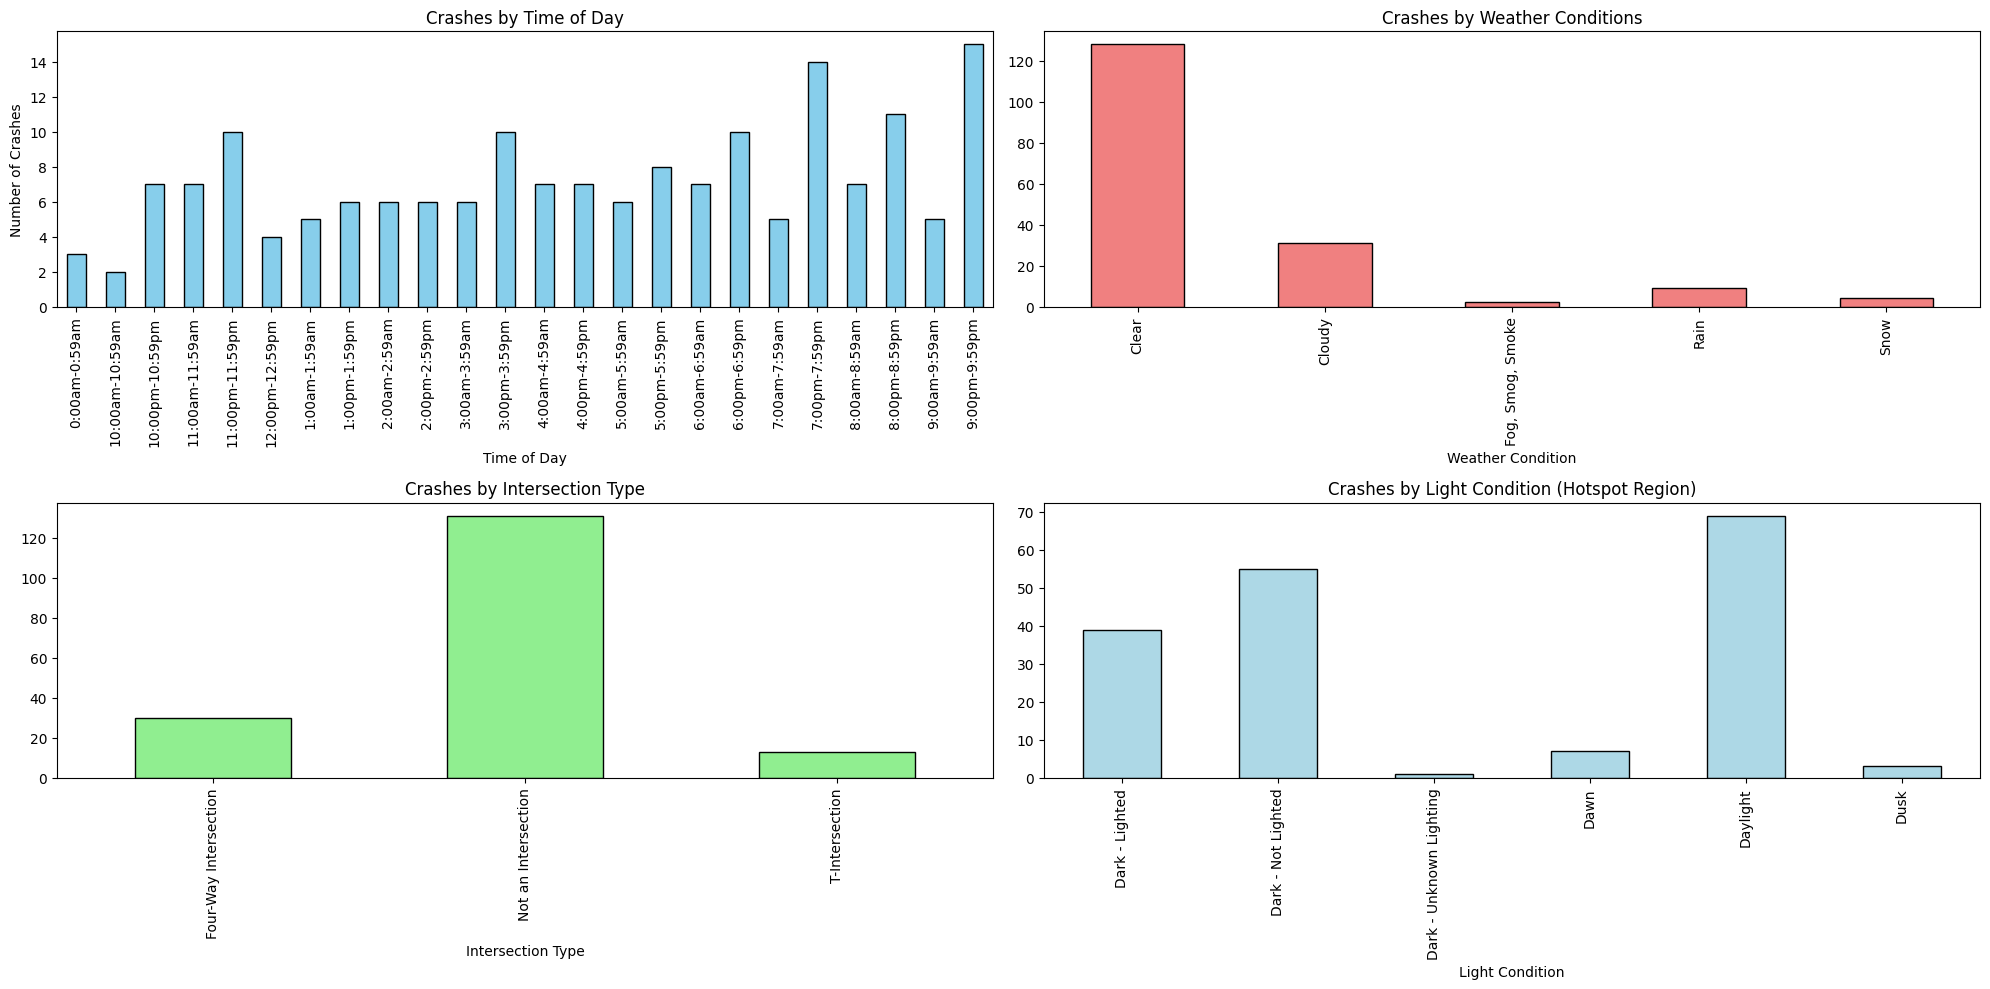

In [38]:
# Group crashes by time of day, weather, and intersection type
hotspots_by_time = pedestrian_fatalities.groupby('HOURNAME').size()
hotspots_by_weather = pedestrian_fatalities.groupby('WEATHERNAME').size()
hotspots_by_intersection = pedestrian_fatalities.groupby('TYP_INTNAME').size()
hotspots_by_light_condition = pedestrian_fatalities.groupby('LGT_CONDNAME').size()

# Plot the grouped data
plt.figure(figsize=(20, 10))

# Plot 1: Crashes by Time of Day
plt.subplot(2, 2, 1)
hotspots_by_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)

# Plot 2: Crashes by Weather Conditions
plt.subplot(2, 2, 2)
hotspots_by_weather.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Crashes by Weather Conditions')
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)

# Plot 3: Crashes by Intersection Type
plt.subplot(2, 2, 3)
hotspots_by_intersection.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Crashes by Intersection Type')
plt.xlabel('Intersection Type')
plt.xticks(rotation=90)

# Plot 4: Crashes by Light Condition
plt.subplot(2, 2, 4)
hotspots_by_light_condition.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Crashes by Light Condition (Hotspot Region)')
plt.xlabel('Light Condition')
plt.xticks(rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

#### INDETIFIED HOTSPOTS

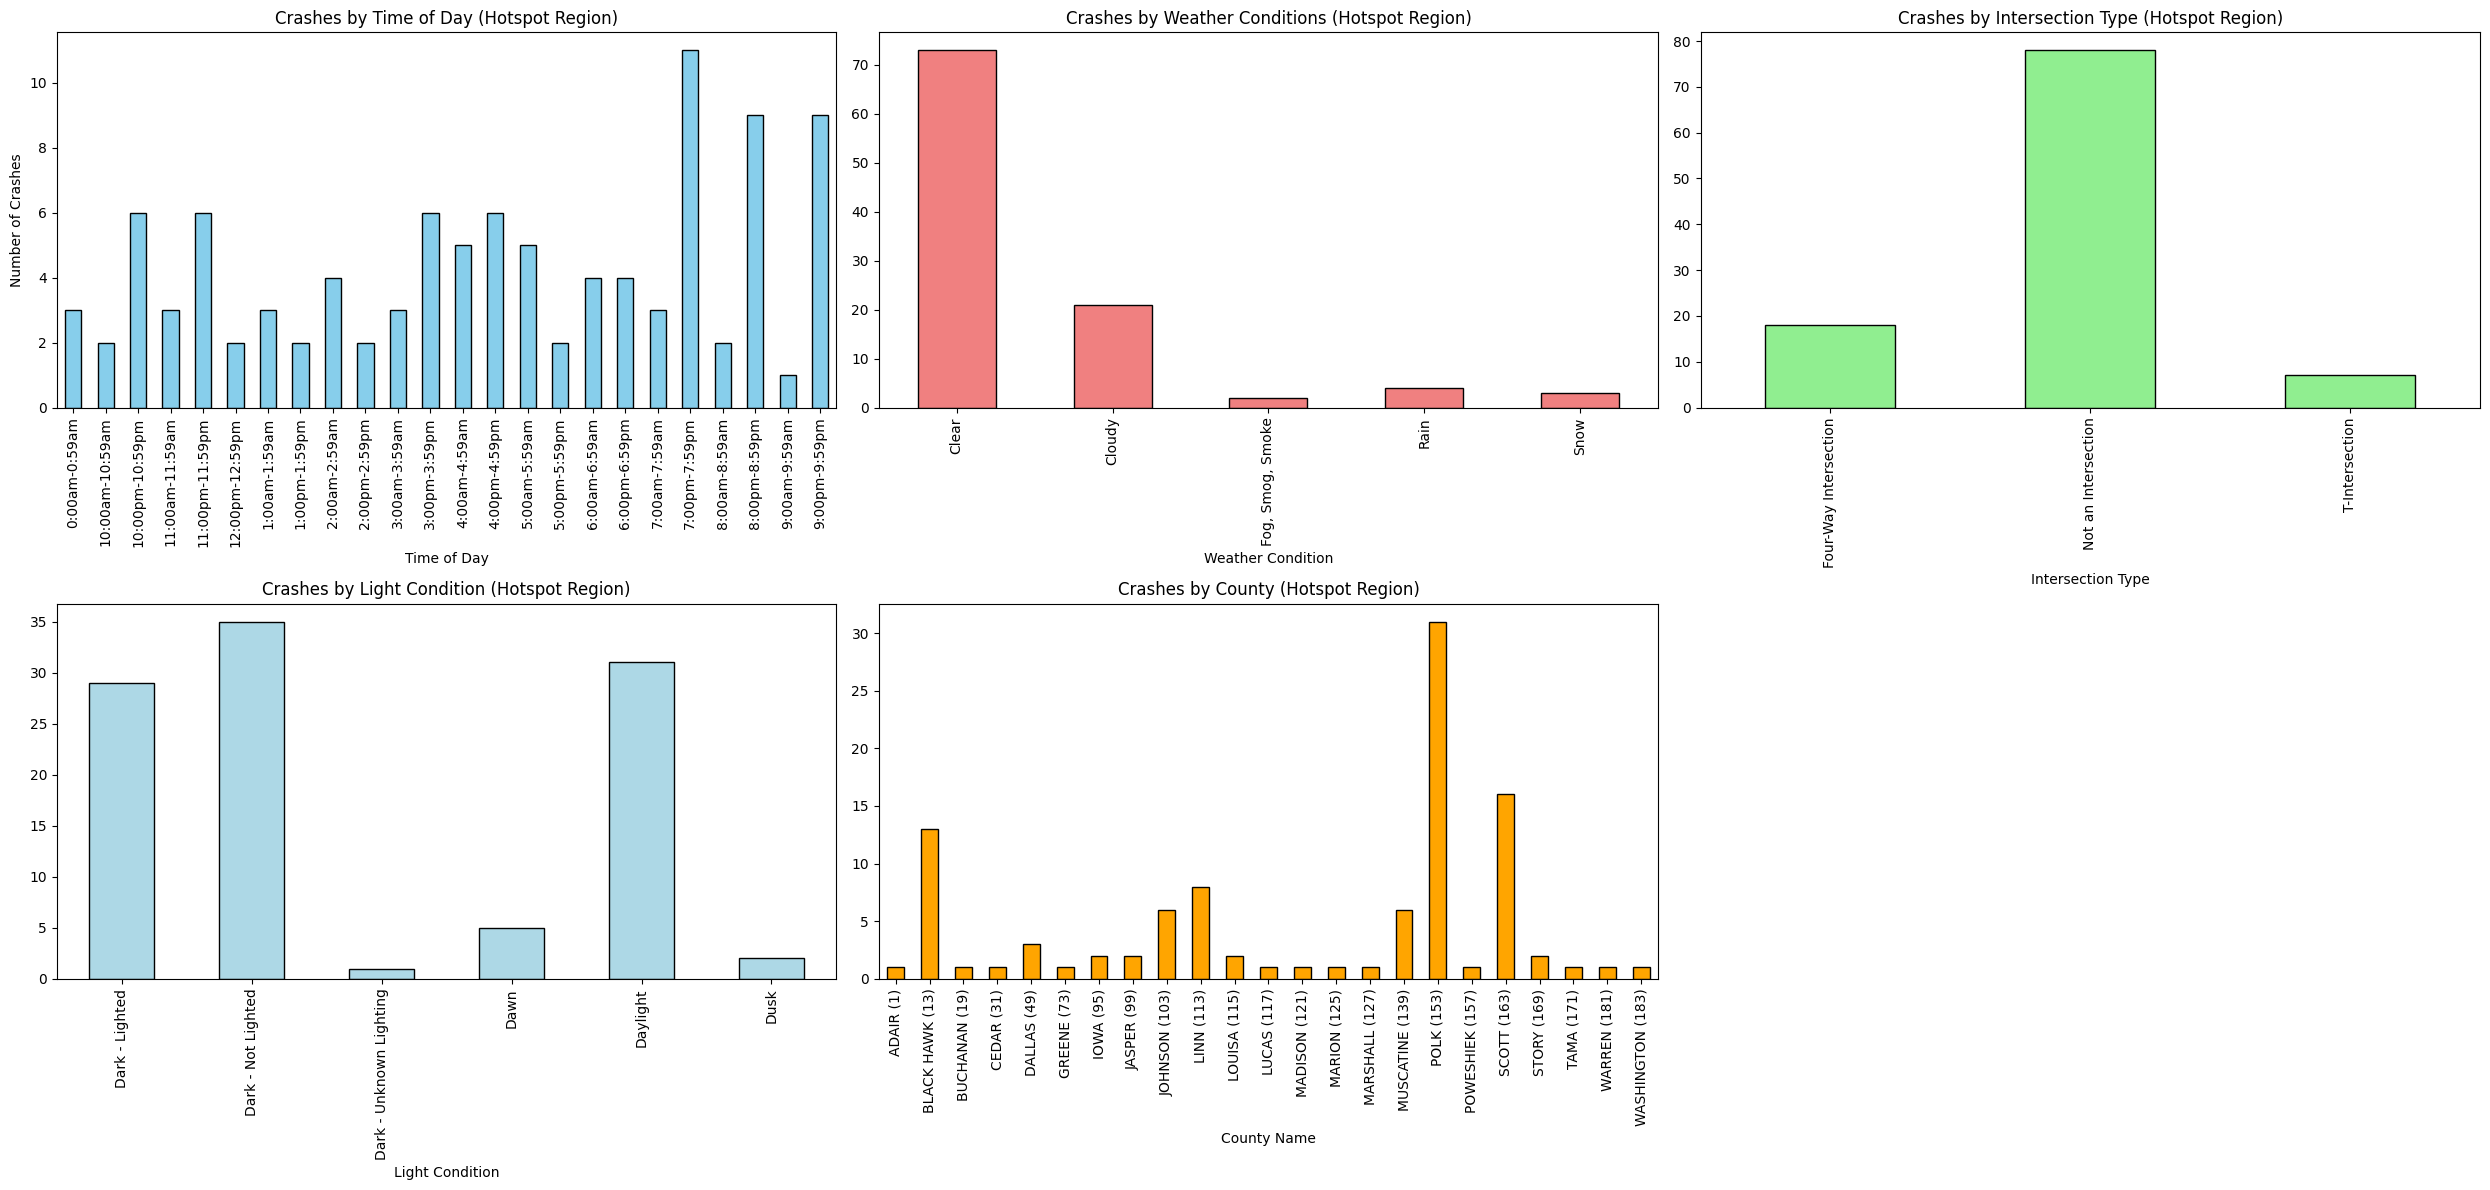

In [39]:
# Create a DataFrame from hotspot coordinates for filtering
hotspot_df = pd.DataFrame(hotspot_coords, columns=['LONGITUD', 'LATITUDE'])

# Define a function to check if a crash falls within a hotspot region
def is_in_hotspot(row):
    return ((hotspot_df['LONGITUD'].sub(row['LONGITUD']).abs() < 0.05) &
            (hotspot_df['LATITUDE'].sub(row['LATITUDE']).abs() < 0.05)).any()

# Filter the pedestrian fatalities to include only those in the hotspot region
hotspot_crashes = pedestrian_fatalities[pedestrian_fatalities.apply(is_in_hotspot, axis=1)]

# Group crashes by time of day, weather, intersection type, light condition, and county
hotspots_by_time = hotspot_crashes.groupby('HOURNAME').size()
hotspots_by_weather = hotspot_crashes.groupby('WEATHERNAME').size()
hotspots_by_intersection = hotspot_crashes.groupby('TYP_INTNAME').size()
hotspots_by_light_condition = hotspot_crashes.groupby('LGT_CONDNAME').size()
hotspots_by_county = hotspot_crashes.groupby('COUNTYNAME').size()

# Plot the grouped data
plt.figure(figsize=(25, 12))

# Plot 1: Crashes by Time of Day
plt.subplot(2, 3, 1)
hotspots_by_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Crashes by Time of Day (Hotspot Region)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)

# Plot 2: Crashes by Weather Conditions
plt.subplot(2, 3, 2)
hotspots_by_weather.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Crashes by Weather Conditions (Hotspot Region)')
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)

# Plot 3: Crashes by Intersection Type
plt.subplot(2, 3, 3)
hotspots_by_intersection.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Crashes by Intersection Type (Hotspot Region)')
plt.xlabel('Intersection Type')
plt.xticks(rotation=90)

# Plot 4: Crashes by Light Condition
plt.subplot(2, 3, 4)
hotspots_by_light_condition.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Crashes by Light Condition (Hotspot Region)')
plt.xlabel('Light Condition')
plt.xticks(rotation=90)

# Plot 5: Crashes by County
plt.subplot(2, 3, 5)
hotspots_by_county.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Crashes by County (Hotspot Region)')
plt.xlabel('County Name')
plt.xticks(rotation=90)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

#**5. Develop a predictive model for crash likelihood on these roads.**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### Logistic Regression Model

In [41]:
# Load the pedestrian fatalities dataset
FARS_Data = pd.read_csv('Fars.csv')

# Create a binary 'Crash_Indicator' column (1 if PEDS >= 1, else 0)
FARS_Data['Crash_Indicator'] = FARS_Data['PEDS'].apply(lambda x: 1 if x >= 1 else 0)

# Prepare the data (features and target)
X = pd.get_dummies(
    FARS_Data[['HOURNAME', 'WEATHERNAME', 'TYP_INTNAME', 'LGT_CONDNAME', 'COUNTYNAME']],
    drop_first=True
)
y = FARS_Data['Crash_Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase iterations if needed
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Optional: Check feature importance (coefficients)
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
# print("\nFeature Coefficients:")
# print(coefficients.sort_values(by='Coefficient', ascending=False))

Model Accuracy: 91.91%


In [42]:
# Print value counts for the original target
print("Original Data (y) Value Counts:")
print(y.value_counts())

# Convert NumPy predictions to Pandas Series to use value_counts()
y_pred_series = pd.Series(y_pred)

# Print value counts for the predictions
print("\nPredicted Data (y_pred) Value Counts:")
print(y_pred_series.value_counts())

# Print value counts for the test data target
print("\nTest Data (y_test) Value Counts:")
print(y_test.value_counts())

Original Data (y) Value Counts:
Crash_Indicator
0    1370
1     174
Name: count, dtype: int64

Predicted Data (y_pred) Value Counts:
0    308
1      1
Name: count, dtype: int64

Test Data (y_test) Value Counts:
Crash_Indicator
0    283
1     26
Name: count, dtype: int64


### Random Forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [44]:

# Load the dataset
FARS_Data = pd.read_csv('Fars.csv')

# Create a binary 'Crash_Indicator' column (1 if PEDS >= 1, else 0)
FARS_Data['Crash_Indicator'] = FARS_Data['PEDS'].apply(lambda x: 1 if x >= 1 else 0)

# Prepare the data (features and target)
X = pd.get_dummies(
    FARS_Data[['HOURNAME', 'WEATHERNAME', 'TYP_INTNAME', 'LGT_CONDNAME', 'COUNTYNAME']],
    drop_first=True
)
y = FARS_Data['Crash_Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=45, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%')

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Check feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print("\nFeature Importances:")
print(feature_importances.sort_values(by='Importance', ascending=False))


Random Forest Model Accuracy: 90.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       283
           1       0.20      0.04      0.06        26

    accuracy                           0.91       309
   macro avg       0.56      0.51      0.51       309
weighted avg       0.86      0.91      0.88       309


Feature Importances:
                                   Importance
WEATHERNAME_Clear                    0.038815
TYP_INTNAME_Not an Intersection      0.033507
LGT_CONDNAME_Dark - Not Lighted      0.033493
TYP_INTNAME_Four-Way Intersection    0.031678
COUNTYNAME_POLK (153)                0.031608
...                                       ...
WEATHERNAME_Unknown                  0.000057
COUNTYNAME_ADAMS (3)                 0.000032
HOURNAME_Unknown Hours               0.000004
TYP_INTNAME_Not Reported             0.000000
WEATHERNAME_Not Reported             0.000000

[148 rows x 1 columns]


In [45]:
# Convert NumPy predictions to Pandas Series to use value_counts()
y_pred_series = pd.Series(y_pred_rf)

# Print value counts for the predictions
print("\nPredicted Data (y_pred) Value Counts:")
print(y_pred_series.value_counts())

# Print value counts for the test data target
print("\nTest Data (y_test) Value Counts:")
print(y_test.value_counts())


Predicted Data (y_pred) Value Counts:
0    304
1      5
Name: count, dtype: int64

Test Data (y_test) Value Counts:
Crash_Indicator
0    283
1     26
Name: count, dtype: int64


### ADJUSTING MODEL BALANCING THE DATA

In [46]:
from imblearn.over_sampling import SMOTE

#### Logistic Regression model using data balancing

In [47]:
# Load the dataset
FARS_Data = pd.read_csv('Fars.csv')

# Create a binary 'Crash_Indicator' column (1 if PEDS >= 1, else 0)
FARS_Data['Crash_Indicator'] = FARS_Data['PEDS'].apply(lambda x: 1 if x >= 1 else 0)

# Prepare the data (features and target)
X = pd.get_dummies(
    FARS_Data[['HOUR', 'WEATHER', 'TYP_INT', 'LGT_COND', 'COUNTY']],
    drop_first=True
)
y = FARS_Data['Crash_Indicator']

# Apply SMOTE to balance the data (target ratio ~60:40)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log = log_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Model Accuracy: {accuracy_log * 100:.2f}%')

# Print classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

# Optional: Check feature importance
log_coefficients = pd.DataFrame(log_model.coef_[0], X.columns, columns=['Coefficient'])
print("\nLogistic Regression Feature Coefficients:")
print(log_coefficients.sort_values(by='Coefficient', ascending=False))

Logistic Regression Model Accuracy: 66.67%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       279
           1       0.00      0.00      0.00       132

    accuracy                           0.67       411
   macro avg       0.34      0.49      0.40       411
weighted avg       0.46      0.67      0.54       411


Logistic Regression Feature Coefficients:
          Coefficient
LGT_COND     0.062614
COUNTY       0.003329
HOUR        -0.011604
WEATHER     -0.065997
TYP_INT     -0.647075


In [48]:
# Print value counts for the original target
print("Original Data (y) Value Counts:")
print(y.value_counts())

# Print value counts for balanced data
print("\nBalanced Data (y) Value Counts:")
print(pd.Series(y_resampled).value_counts())

# Convert NumPy predictions to Pandas Series to use value_counts()
y_pred_series = pd.Series(y_pred_log)

# Print value counts for the predictions
print("\nPredicted Data (y_pred) Value Counts:")
print(y_pred_series.value_counts())

# Print value counts for the test data target
print("\nTest Data (y_test) Value Counts:")
print(y_test.value_counts())

Original Data (y) Value Counts:
Crash_Indicator
0    1370
1     174
Name: count, dtype: int64

Balanced Data (y) Value Counts:
Crash_Indicator
0    1370
1     685
Name: count, dtype: int64

Predicted Data (y_pred) Value Counts:
0    406
1      5
Name: count, dtype: int64

Test Data (y_test) Value Counts:
Crash_Indicator
0    279
1    132
Name: count, dtype: int64


#### Random Forest model using data balancing

In [49]:
# Apply SMOTE to balance the data (target ratio ~50:50)
smote = SMOTE(sampling_strategy=0.50, random_state=45)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=100, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%')

# Print classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Check feature importance
rf_feature_importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])
print("\nRandom Forest Feature Importances:")
print(rf_feature_importances.sort_values(by='Importance', ascending=False))

Random Forest Model Accuracy: 81.51%

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       279
           1       0.71      0.72      0.71       132

    accuracy                           0.82       411
   macro avg       0.79      0.79      0.79       411
weighted avg       0.82      0.82      0.82       411


Random Forest Feature Importances:
          Importance
COUNTY      0.477898
HOUR        0.296351
WEATHER     0.091945
LGT_COND    0.084934
TYP_INT     0.048871


In [50]:
# Convert NumPy predictions to Pandas Series to use value_counts()
y_pred_series = pd.Series(y_pred_rf)

# Print value counts for the predictions
print("\nPredicted Data (y_pred) Value Counts:")
print(y_pred_series.value_counts())

# Print value counts for the test data target
print("\nTest Data (y_test) Value Counts:")
print(y_test.value_counts())


Predicted Data (y_pred) Value Counts:
0    277
1    134
Name: count, dtype: int64

Test Data (y_test) Value Counts:
Crash_Indicator
0    279
1    132
Name: count, dtype: int64


#**6. Create visualizations and time-lapse animations of crash patterns**

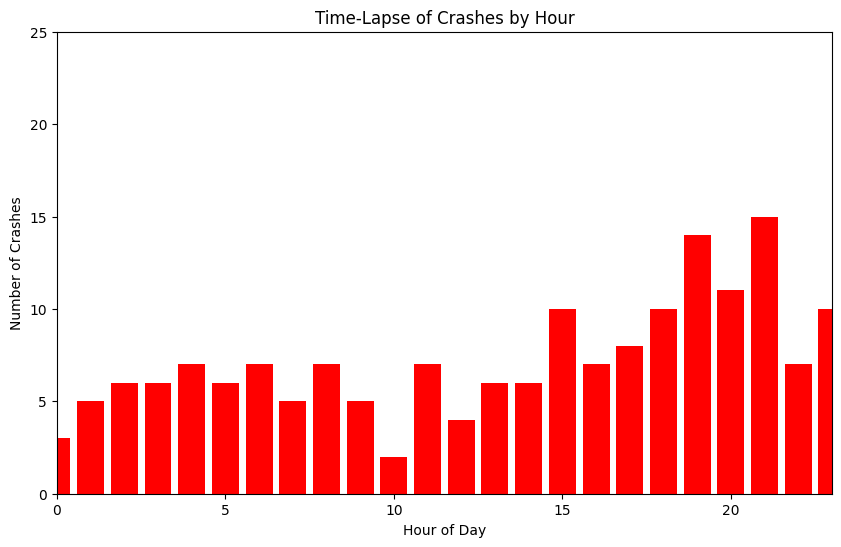

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the dataset
FARS_Data = pd.read_csv('pedestrian_fatalities_iowa.csv')

# Create a time-related column (e.g., extract hour from HOURNAME)
FARS_Data['Hour'] = pd.to_numeric(FARS_Data['HOUR'], errors='coerce')

# Group crashes by hour
hourly_crashes = FARS_Data.groupby('Hour').size().reindex(range(24), fill_value=0).reset_index(name='Count')

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 23)  # Hours range from 0 to 23
ax.set_ylim(0, hourly_crashes['Count'].max() + 10)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Crashes')
ax.set_title('Time-Lapse of Crashes by Hour')

# Initialize the bar plot
bars = ax.bar(hourly_crashes['Hour'], [0] * 24, color='red')

# Update function to change bar heights dynamically
def update(frame):
    for i, bar in enumerate(bars):
        if i <= frame:
            bar.set_height(hourly_crashes.iloc[i]['Count'])
        else:
            bar.set_height(0)  # Reset height for future frames

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=24, repeat=True, interval=500)

# Save the animation using Pillow writer
ani.save('crash_timeline.gif', writer='pillow', fps=2)

# Display the animation
plt.show()



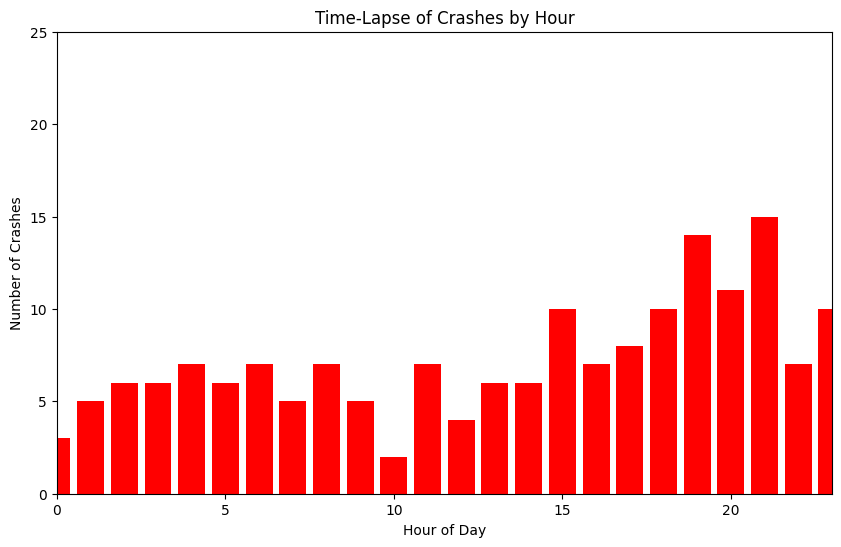

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Load the dataset
FARS_Data = pd.read_csv('pedestrian_fatalities_iowa.csv')

# Create a time-related column (e.g., extract hour from HOURNAME)
FARS_Data['Hour'] = pd.to_numeric(FARS_Data['HOUR'], errors='coerce')

# Group crashes by hour (ensure all 24 hours are included)
hourly_crashes = FARS_Data.groupby('Hour').size().reindex(range(24), fill_value=0).reset_index(name='Count')

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 23)  # Hours range from 0 to 23
ax.set_ylim(0, hourly_crashes['Count'].max() + 10)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Crashes')
ax.set_title('Time-Lapse of Crashes by Hour')

# Initialize the bar plot
bars = ax.bar(hourly_crashes['Hour'], [0] * 24, color='red')

# Update function to animate one bar at a time
def update(frame):
    bars[frame].set_height(hourly_crashes.iloc[frame]['Count'])
    return bars

# Create the animation with smoother updates
ani = animation.FuncAnimation(fig, update, frames=24, repeat=True, interval=500)

# Display the animation in Colab using HTML
HTML(ani.to_jshtml())


In [53]:
import pandas as pd
import plotly.express as px

# Load the dataset
FARS_Data = pd.read_csv('pedestrian_fatalities_iowa.csv')

# Create a time-related column (e.g., extract hour from HOURNAME)
FARS_Data['Hour'] = pd.to_numeric(FARS_Data['HOUR'], errors='coerce')

# Group crashes by hour and weather
crash_patterns = FARS_Data.groupby(['Hour', 'WEATHERNAME']).size().reset_index(name='Count')

# Ensure all categories are included
all_weather = FARS_Data['WEATHERNAME'].unique()

# Create an animated scatter plot using Plotly Express
fig = px.scatter(
    crash_patterns,
    x='Hour',
    y='Count',
    animation_frame='Hour',
    animation_group='WEATHERNAME',
    color='WEATHERNAME',
    size='Count',
    category_orders={'WEATHERNAME': all_weather},
    title='Time-Lapse of Crashes by Hour and Weather',
    range_x=[0, 23],
    range_y=[0, crash_patterns['Count'].max() + 10],
    labels={'Hour': 'Hour of Day', 'Count': 'Number of Crashes'}
)

# Display the plot in Colab
fig.show()


In [54]:
# Create a time-related column (e.g., extract hour from HOURNAME)
FARS_Data['Hour'] = pd.to_numeric(FARS_Data['HOUR'], errors='coerce')

# Fill missing weather names with 'Unknown'
FARS_Data['WEATHERNAME'].fillna('Unknown', inplace=True)

# Define all possible weather categories
all_weather_conditions = ['Clear', 'Cloudy', 'Rain', 'Fog', 'Snow', 'Unknown']

# Ensure WEATHERNAME is treated as a categorical variable with all categories
FARS_Data['WEATHERNAME'] = pd.Categorical(
    FARS_Data['WEATHERNAME'], categories=all_weather_conditions
)

# Create a DataFrame with all hour-weather combinations (to ensure all labels appear)
all_combinations = pd.MultiIndex.from_product(
    [range(24), all_weather_conditions], names=['Hour', 'WEATHERNAME']
).to_frame(index=False)

# Merge with the actual crash data to fill missing combinations with 0 counts
crash_counts = FARS_Data.groupby(['Hour', 'WEATHERNAME']).size().reset_index(name='Count')
crash_patterns = pd.merge(all_combinations, crash_counts, on=['Hour', 'WEATHERNAME'], how='left').fillna(0)

# Create the animated scatter plot
fig = px.scatter(
    crash_patterns,
    x='Hour',
    y='Count',
    animation_frame='Hour',
    animation_group='WEATHERNAME',
    color='WEATHERNAME',
    size='Count',
    title='Time-Lapse of Crashes by Hour and Weather',
    range_x=[0, 23],
    range_y=[0, crash_patterns['Count'].max() + 10],
    labels={'Hour': 'Hour of Day', 'Count': 'Number of Crashes'}
)

# Show the plot in Colab
fig.show()

<ipython-input-54-cfd49c9cb703>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-54-cfd49c9cb703>:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# 7. Propose data-driven recommendations for improving pedestrian safety on these roads

From analyzing the crash data,  suggestions based on data can be proposed to enhance pedestrian safety. These suggestions target particular patterns in the data,  including crash trends based on time of day, weather conditions,  intersection types, and road characteristics.

**Put in place safety measures based on time**

Data indicates a rise in pedestrian accidents during the late afternoon (15:00–18:00) and evenings (19:00–22:00). Reducing speed limits in high-risk areas is recommended to decrease the risks during peak times. Law enforcement or automated speed cameras can enforce adherence, and adaptive pedestrian signals can be implemented to provide pedestrians with extra time to cross safely during busy times.

**Enhance the quality of road lighting**

Data indicates that increased crash rates are linked to dark conditions, especially during twilight and nighttime. Enhancing visibility can be performed by installing or upgrading street lighting at intersections and pedestrian crossings. Motion-activated or adaptive lighting systems ensure proper lighting in the presence of pedestrians. Performing routine lighting assessments will assist in guaranteeing sufficient brightness in critical locations.

**Implement traffic control systems adjusted to weather conditions**

According to fatal pedestrian data investigation, roads with regular crashes during adverse weather require dynamic speed limits that adjust according to the road conditions. In addition, non-slip layers should be installed to avoid slips during icing conditions. Also, to prevent dark road segments, reflective signs, and flashing beacons can improve visibility and alert drivers in foggy or snowy conditions.

**Correct intersections with high risk**

Intersections without traffic controls or inadequate signal design are frequent areas for pedestrian accidents. Including pedestrian refuge islands at more significant intersections will provide individuals with a secure location to cross in multiple stages. Pedestrian head-starts, where pedestrians get a few seconds to cross before vehicles move, should also be included in traffic lights. In certain situations, substituting intersections with roundabouts may be more effective to lessen vehicle speeds and decrease potential conflicts.

**Implement traffic speed reduction features on major roads**

Multi-lane arterial roads, where pedestrians are at risk, are dangerous due to high vehicle speeds. Zones with high pedestrian traffic should have traffic speed reduction elements or features, like speed bumps or raised crosswalks. In  Iowa, especially in Iowa City and Des Moines, reducing the width of lanes in some road sections can also decrease the speed of vehicles, leading to a safer environment.

**Implement specific plans**

The FARS data shows that Polk, Scott, and Black Hawk counties have a higher rate of pedestrian fatalities, representing the hotspot locations in Iowa. These regions need to implement specific strategies, such as implementing automatic speed enforcement,  to address the issue of speeding. Every county could also benefit from a personalized pedestrian safety plan considering specific risks and priorities according to traffic patterns.